<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Assignment7_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
import graphviz
import pydot
from io import StringIO  

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## WINE EXAMPLE

In [2]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 97 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (97/97), done.


In [3]:
wine = pd.read_csv('ML_656/winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine['quality'] = wine['quality'] > 6
wine['quality'].describe()

count      1599
unique        2
top       False
freq       1382
Name: quality, dtype: object

In [7]:
np.random.seed(42)
train, test = train_test_split(wine, test_size = 0.5)
val, test = train_test_split(test, test_size = 0.5)
X_train = train.drop(columns = ['quality']).values
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
y_train = train['quality'].values
X_val = val.drop(columns = ['quality']).values
X_val = scaler.transform(X_val)
y_val = val['quality'].values
X_test = test.drop(columns = ['quality']).values
X_test = scaler.transform(X_test)
y_test = test['quality'].values

Tree Classifier

In [8]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
  tree = estimator
  names = features
  color = filled
  classn = class_names
  dot_data = StringIO()
  export_graphviz(estimator, out_file=dot_data,feature_names=features,class_names=classn, filled=filled)
  graph = pydot.graph_from_dot_data(dot_data.getvalue())
  return(graph)

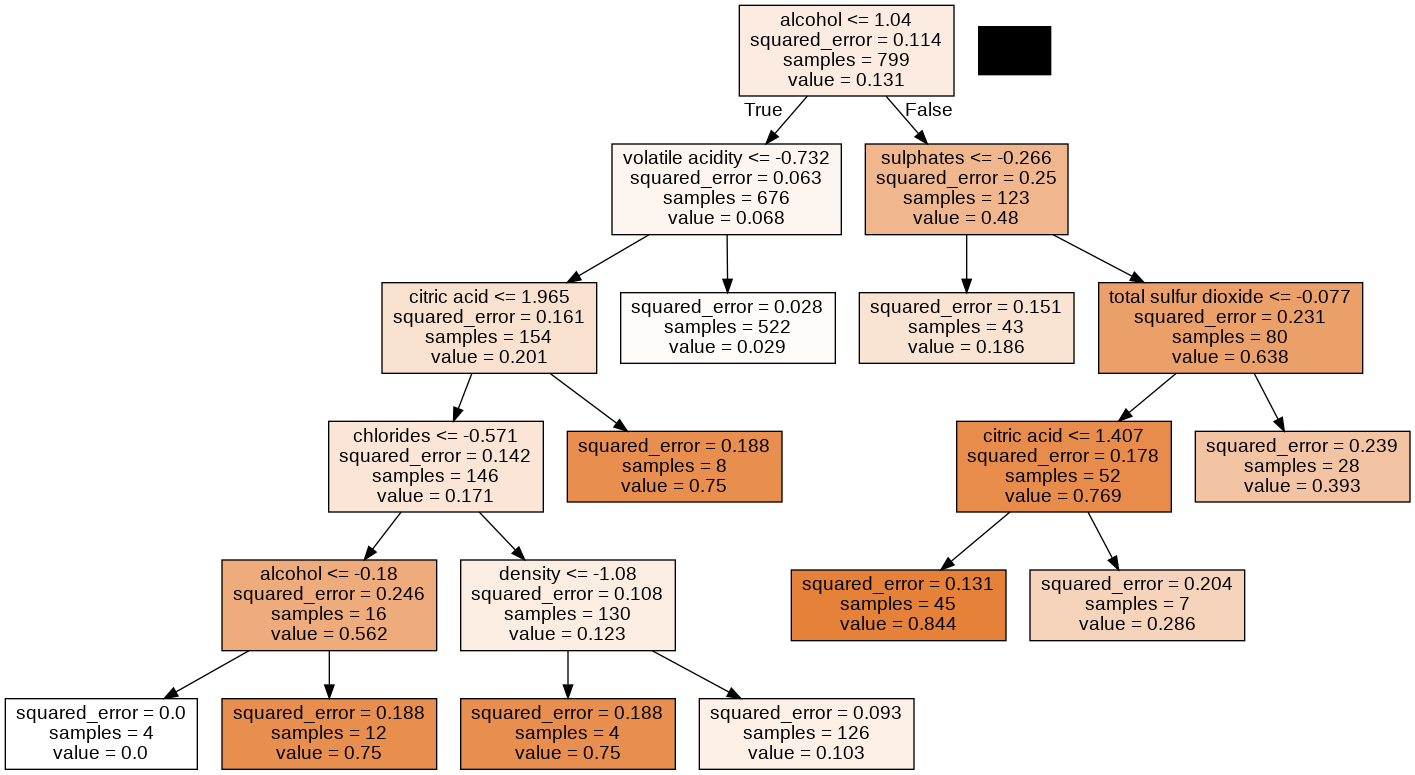

In [9]:
wine_tree = DecisionTreeRegressor(min_samples_split=5,min_impurity_decrease=0.002)
wine_tree.fit(X_train, y_train)
graph, = print_tree(wine_tree, features= train.drop(columns = ['quality']).columns)
Image(graph.create_png())

In [10]:
wine_tree_preds = wine_tree.predict(X_test)

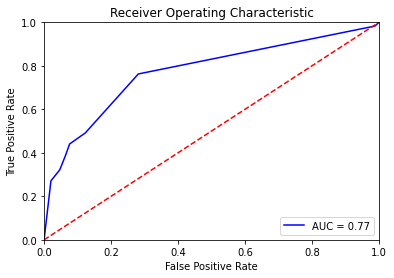

In [11]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_tree_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

In [12]:
wine_rf = RandomForestRegressor(max_features=4, n_estimators=2000, random_state=1)
wine_rf.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=2000, random_state=1)

In [13]:
wine_rf_val_pred = wine_rf.predict(X_val)

In [14]:
fpr, tpr, threshold = roc_curve(val['quality'], wine_rf_val_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.9094122124952423

In [15]:
wine_rf_preds = wine_rf.predict(X_test)

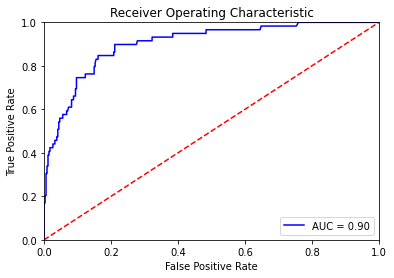

In [16]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_rf_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
confusion_matrix(test['quality'], (wine_rf_preds > 0.1))

array([[256,  85],
       [  6,  53]])

Boosting

In [18]:
wine_boost = GradientBoostingRegressor(n_estimators=750, learning_rate=0.075,random_state=1)
wine_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.075, n_estimators=750, random_state=1)

In [19]:
wine_boost_val_pred = wine_boost.predict(X_val)

In [20]:
fpr, tpr, threshold = roc_curve(val['quality'], wine_boost_val_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.8777119243108041

In [21]:
wine_boost_preds = wine_boost.predict(X_test)

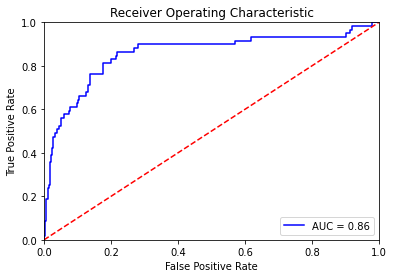

In [22]:
fpr, tpr, threshold = roc_curve(test['quality'], wine_boost_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Neural Nets

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 1097 to 1126
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         799 non-null    float64
 1   volatile acidity      799 non-null    float64
 2   citric acid           799 non-null    float64
 3   residual sugar        799 non-null    float64
 4   chlorides             799 non-null    float64
 5   free sulfur dioxide   799 non-null    float64
 6   total sulfur dioxide  799 non-null    float64
 7   density               799 non-null    float64
 8   pH                    799 non-null    float64
 9   sulphates             799 non-null    float64
 10  alcohol               799 non-null    float64
 11  quality               799 non-null    bool   
dtypes: bool(1), float64(11)
memory usage: 75.7 KB


In [32]:
inputs = keras.Input(shape=(11,))
x = layers.Dense(6, activation="relu", name="dense_1")(inputs)
x = layers.Dense(5, activation="relu", name="dense_2")(x)
x = layers.Dense(4, activation="sigmoid", name="dense_3")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
wine_nnet = keras.Model(inputs=inputs, outputs=outputs)
wine_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [33]:
history = wine_nnet.fit(
  X_train,
  y_train,
  batch_size=45,
  epochs=1000
)

Epoch 1/1000
18/18 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8686
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8686
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8686
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8686
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.8686
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8686
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8686
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8686
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8686
Epoch 10/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8686

In [34]:
wine_nnet_val_preds = wine_nnet.predict(X_val)

In [35]:
fpr, tpr, threshold = roc_curve(y_val, wine_nnet_val_preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.830215866456419

In [36]:
wine_nnet_preds = wine_nnet.predict(X_test)

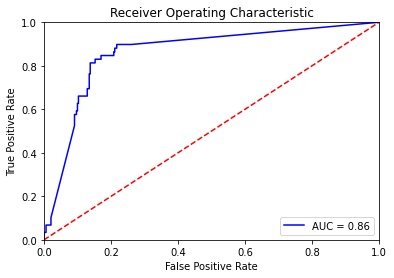

In [37]:
fpr, tpr, threshold = roc_curve(y_test, wine_nnet_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()